# Task 4

---

### Imports and sampling of data

In [1]:
# libraries
import pandas as pd
from matplotlib import pyplot
from sklearn import metrics 
from sklearn.model_selection import KFold
import numpy as np 
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#paths to the file containing the samples with the processed features
feature_of_counts = "../processed_data/feature_vectors_counts_new.csv"

In [4]:
# Importing the dataset, and performing an undersampling of the benignware
dataset = pd.read_csv(feature_of_counts, index_col=0)

malware= dataset.loc[dataset["malware"] == True]
benign = dataset.loc[dataset["malware"] == False]
benign_undersample = benign.sample(n=len(malware), replace= False, random_state=42)

dataset= pd.concat([malware, benign_undersample])
X = dataset.iloc[:,1:8].values
y = dataset.iloc[:, 8].values

In [5]:
# Splitting (randomly) the dataset into the Training set and the (unseen) Test set
# Note this is only for the first task of the coursework. You'll need a different approach for the other tasks, as they also need a validation stage in addition to the test with unseen data.
# Also note the split is training 80% and test 20%) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int), random_state=42, test_size = 0.2)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

---

### Optimizing threshold

In [7]:
from sklearn.ensemble import RandomForestClassifier

## Best parameters found in previous task
clf = RandomForestClassifier(min_samples_leaf=1, max_features="sqrt", random_state=42)

In [8]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
y_scores = clf.predict_proba(X_test)[:, 1]

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)

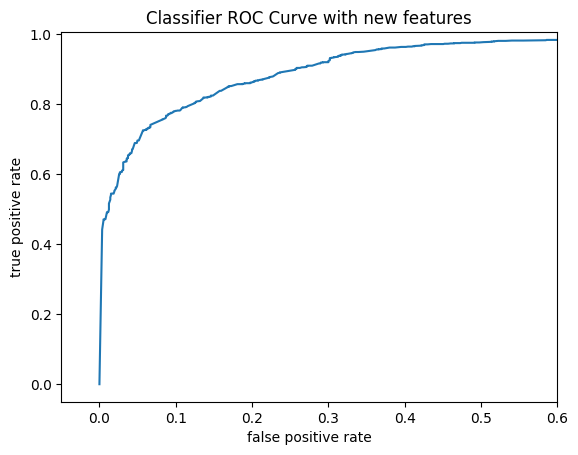

In [11]:
plt.plot(fpr, tpr)
plt.xlabel('false positive rate')
plt.xlim([-0.05, 0.6])
plt.ylabel('true positive rate')
plt.ylim([-0.05, 1.005])
plt.title('Classifier ROC Curve with new features')
plt.show()

In [12]:
# Assume fpr, tpr, thresholds are obtained from roc_curve
index = np.where(fpr <= 0.35)[0][-1]  # Get the last index where FPR is less than or equal to 0.08
desired_threshold = thresholds[index]
print(desired_threshold)

0.19642207792207786


Accuracy: 0.80
Precision: 0.73
Recall: 0.95
F1 Score: 0.82
Confusion Matrix:
 [[ 734  389]
 [  56 1045]]


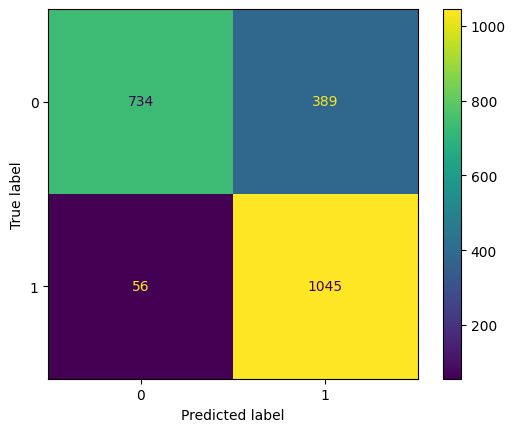

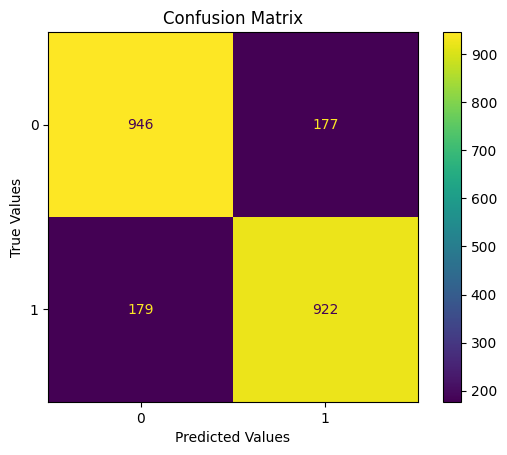

In [13]:
threshold = desired_threshold  # Example threshold

# Apply threshold to convert probabilities to binary predictions
predictions = (y_scores >= threshold).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n', conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title('Confusion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()
